In [1]:
import pandas as pd
import random
from faker import Faker
import numpy as np

# Initialize Faker and random seed
fake = Faker()
random.seed(42)
np.random.seed(42)

# Parameters
num_customers = 1000
num_products = 20
num_interactions = 5000

# Generate unique customers and products
customer_ids = ['CID' + str(i).zfill(8) for i in range(1, num_customers + 1)]
product_ids = [f"PROD_{i+1:04d}" for i in range(num_products)]

# Interaction types
interaction_types = ['viewed', 'clicked', 'purchased']

# Generate interaction data
data = []
for _ in range(num_interactions):
    customer = random.choice(customer_ids)
    product = random.choice(product_ids)
    interaction = random.choices(interaction_types, weights=[0.6, 0.3, 0.1])[0]  # more views than purchases
    date = fake.date_between(start_date='-1y', end_date='today')
    data.append([customer, product, interaction, date])

df_interactions = pd.DataFrame(data, columns=['customer_id', 'product_id', 'interaction_type', 'interaction_date'])


In [2]:
df_interactions.to_csv("Interactions_data.csv", index=False)

In [3]:
df_interactions = pd.read_csv("Interactions_data.csv")

In [4]:
df_interactions

customer_id product_id interaction_type interaction_date
0     CID00000655  PROD_0004           viewed       2024-07-14
1     CID00000282  PROD_0008           viewed       2025-04-24
2     CID00000755  PROD_0004          clicked       2025-02-27
3     CID00000914  PROD_0018           viewed       2024-07-18
4     CID00000433  PROD_0002           viewed       2024-05-20
...           ...        ...              ...              ...
4995  CID00000234  PROD_0015           viewed       2025-03-23
4996  CID00000204  PROD_0009           viewed       2024-05-14
4997  CID00000766  PROD_0001           viewed       2024-11-02
4998  CID00000658  PROD_0014           viewed       2024-08-16
4999  CID00000826  PROD_0016          clicked       2024-08-18

[5000 rows x 4 columns]

In [5]:
# Map interaction type to a score
interaction_score_map = {'viewed': 1, 'clicked': 2, 'purchased': 3}
df_interactions['interaction_score'] = df_interactions['interaction_type'].map(interaction_score_map)

# Convert dates
df_interactions['interaction_date'] = pd.to_datetime(df_interactions['interaction_date'])
latest_date = df_interactions['interaction_date'].max()

# Add days_since_last_interaction
df_interactions['days_since_interaction'] = (latest_date - df_interactions['interaction_date']).dt.days

# Aggregated features
customer_freq = df_interactions.groupby('customer_id').size().rename('total_customer_interactions')
product_freq = df_interactions.groupby('product_id').size().rename('total_product_interactions')

df_interactions = df_interactions.merge(customer_freq, on='customer_id')
df_interactions = df_interactions.merge(product_freq, on='product_id')


In [6]:
df_interactions

customer_id product_id interaction_type interaction_date  \
0     CID00000655  PROD_0004           viewed       2024-07-14   
1     CID00000282  PROD_0008           viewed       2025-04-24   
2     CID00000755  PROD_0004          clicked       2025-02-27   
3     CID00000914  PROD_0018           viewed       2024-07-18   
4     CID00000433  PROD_0002           viewed       2024-05-20   
...           ...        ...              ...              ...   
4995  CID00000234  PROD_0015           viewed       2025-03-23   
4996  CID00000204  PROD_0009           viewed       2024-05-14   
4997  CID00000766  PROD_0001           viewed       2024-11-02   
4998  CID00000658  PROD_0014           viewed       2024-08-16   
4999  CID00000826  PROD_0016          clicked       2024-08-18   

      interaction_score  days_since_interaction  total_customer_interactions  \
0                     1                     285                           10   
1                     1                       1                            7   
2                     2                      57                            3   
3                     1                     281                            6   
4                     1                     340                            6   
...                 ...                     ...                          ...   
4995                  1                      33                            8   
4996                  1                     346                            6   
4997                  1                     174                            1   
4998                  1                     252                            6   
4999                  2                     250                            6   

      total_product_interactions  
0                            257  
1                            251  
2                            257  
3                            279  
4                            234  
...                          ...  
4995                         244  
4996                         235  
4997                         212  
4998                         252  
4999                         280  

[5000 rows x 8 columns]

In [7]:
df_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   customer_id                  5000 non-null   object        
 1   product_id                   5000 non-null   object        
 2   interaction_type             5000 non-null   object        
 3   interaction_date             5000 non-null   datetime64[ns]
 4   interaction_score            5000 non-null   int64         
 5   days_since_interaction       5000 non-null   int64         
 6   total_customer_interactions  5000 non-null   int64         
 7   total_product_interactions   5000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 312.6+ KB


In [9]:
# Basic Info
print(df_interactions.info())

# Summary Statistics
print(df_interactions.describe())

# Check for missing values
print(df_interactions.isnull().sum())

# Check for unique values in categorical columns
print(df_interactions['interaction_type'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   customer_id                  5000 non-null   object        
 1   product_id                   5000 non-null   object        
 2   interaction_type             5000 non-null   object        
 3   interaction_date             5000 non-null   datetime64[ns]
 4   interaction_score            5000 non-null   int64         
 5   days_since_interaction       5000 non-null   int64         
 6   total_customer_interactions  5000 non-null   int64         
 7   total_product_interactions   5000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 312.6+ KB
None
                 interaction_date  interaction_score  days_since_interaction  \
count                        5000        5000.000000             5000.000000   
mean   2

C:\Users\Bhuvanesh\AppData\Local\Temp\ipykernel_7640\623519532.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df_interactions, palette='viridis')


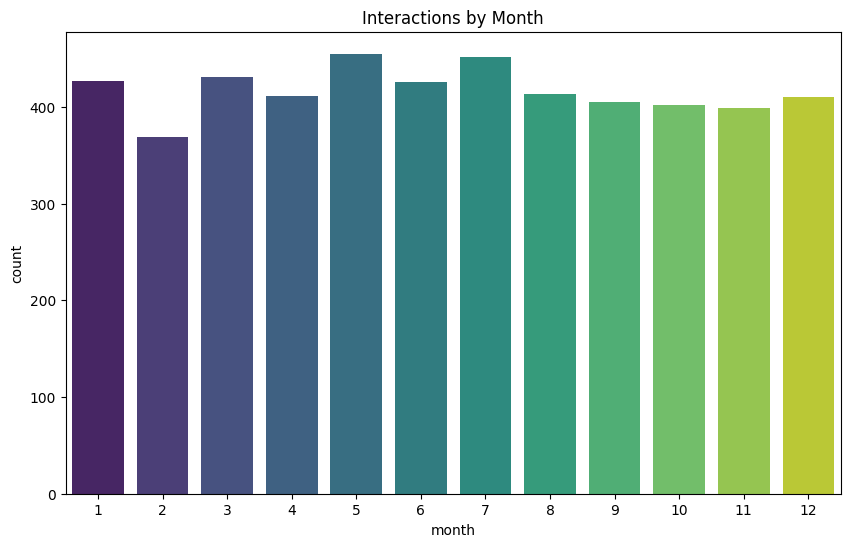

C:\Users\Bhuvanesh\AppData\Local\Temp\ipykernel_7640\623519532.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weekday', data=df_interactions, palette='coolwarm')


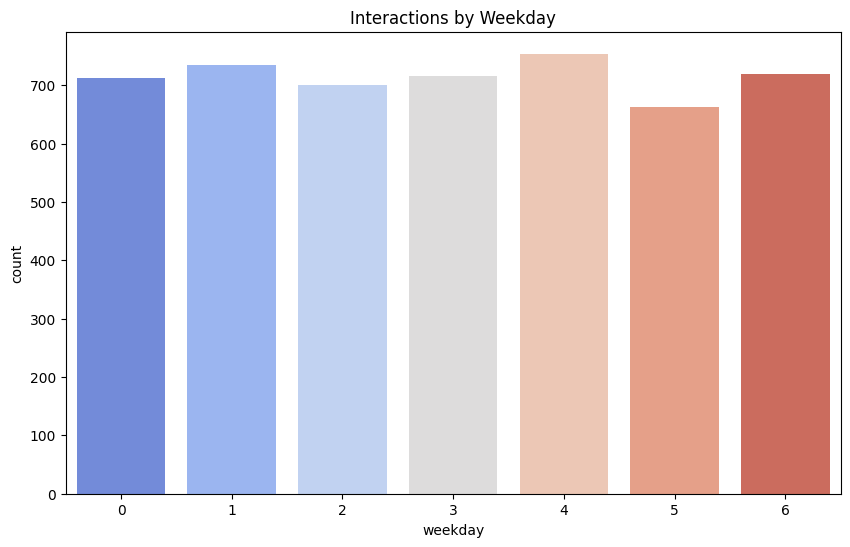

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year, month, day, weekday, etc. from the interaction date
df_interactions['year'] = df_interactions['interaction_date'].dt.year
df_interactions['month'] = df_interactions['interaction_date'].dt.month
df_interactions['day'] = df_interactions['interaction_date'].dt.day
df_interactions['weekday'] = df_interactions['interaction_date'].dt.weekday

# Plot the distribution of interactions by month and year
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df_interactions, palette='viridis')
plt.title("Interactions by Month")
plt.show()

# Distribution of interactions by weekday
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=df_interactions, palette='coolwarm')
plt.title("Interactions by Weekday")
plt.show()


C:\Users\Bhuvanesh\AppData\Local\Temp\ipykernel_7640\2179181623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='interaction_type', data=df_interactions, palette='Set2')


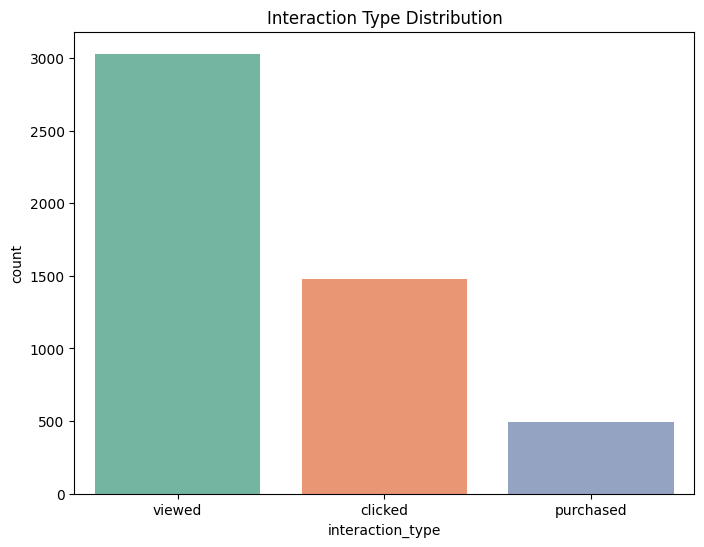

In [14]:
# Distribution of interaction types
plt.figure(figsize=(8, 6))
sns.countplot(x='interaction_type', data=df_interactions, palette='Set2')
plt.title("Interaction Type Distribution")
plt.show()


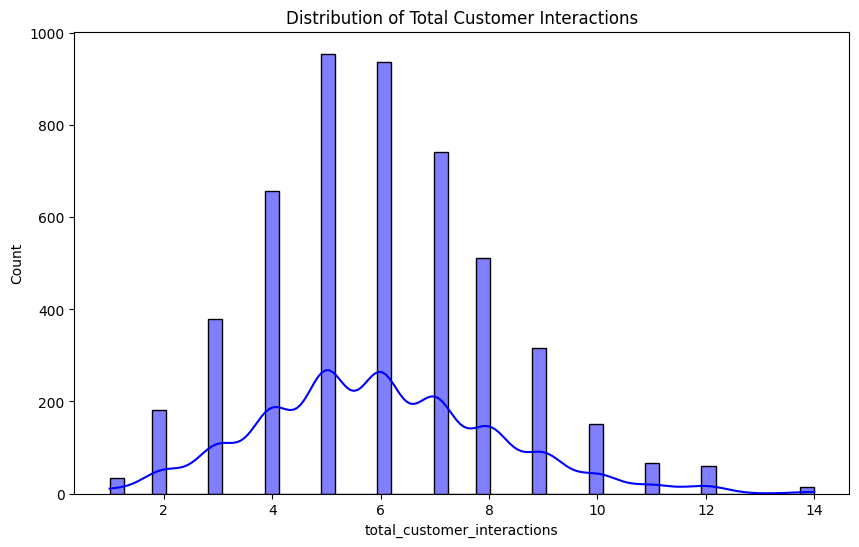

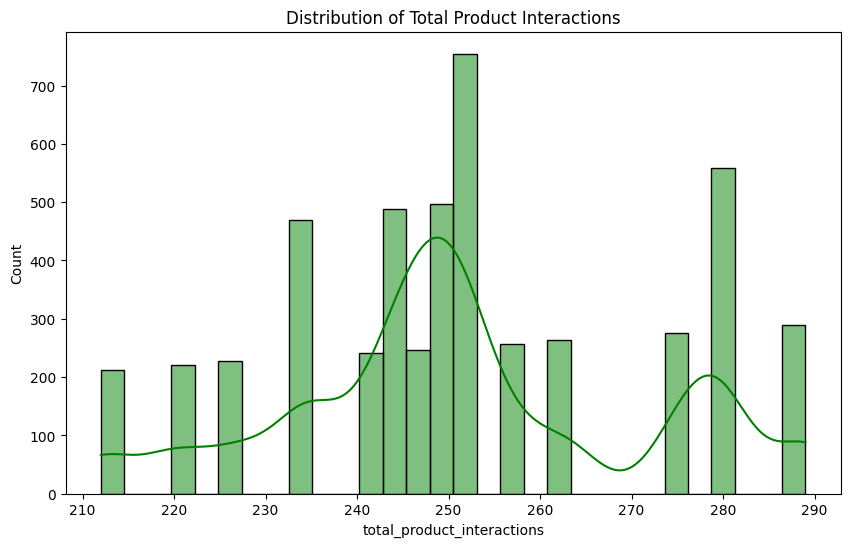

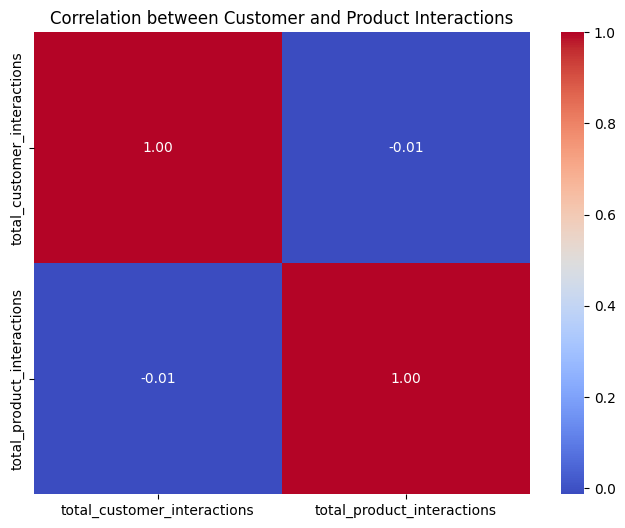

In [15]:
# Distribution of total customer interactions
plt.figure(figsize=(10, 6))
sns.histplot(df_interactions['total_customer_interactions'], kde=True, color='blue')
plt.title("Distribution of Total Customer Interactions")
plt.show()

# Distribution of total product interactions
plt.figure(figsize=(10, 6))
sns.histplot(df_interactions['total_product_interactions'], kde=True, color='green')
plt.title("Distribution of Total Product Interactions")
plt.show()

# Check the correlation between customer interactions and product interactions
plt.figure(figsize=(8, 6))
sns.heatmap(df_interactions[['total_customer_interactions', 'total_product_interactions']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Customer and Product Interactions")
plt.show()


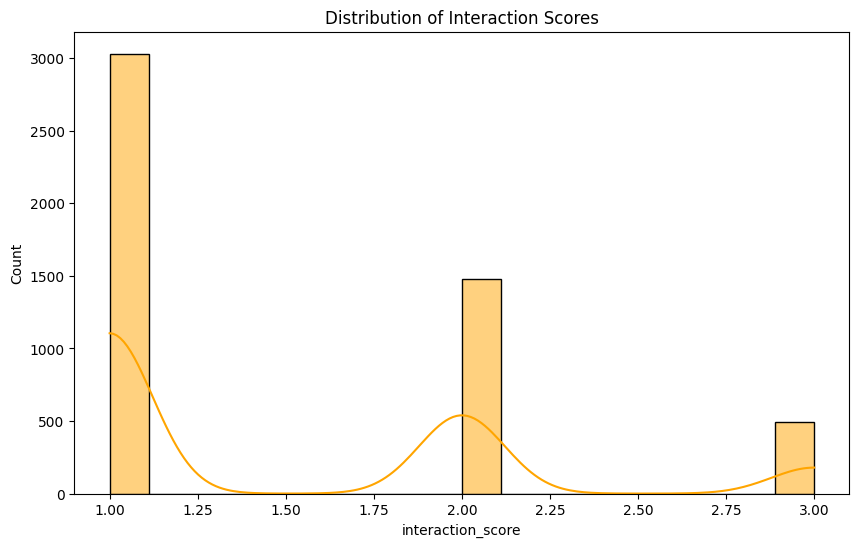

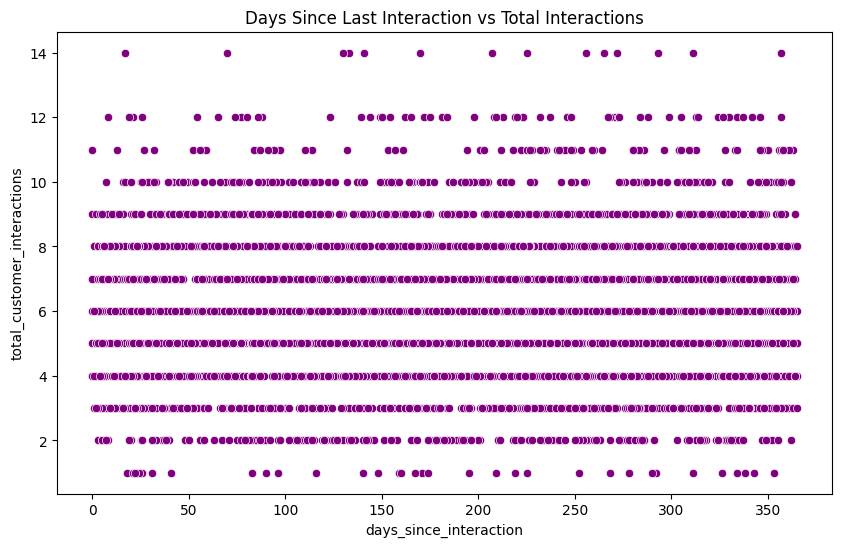

In [16]:
# Plot customer interaction score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_interactions['interaction_score'], kde=True, color='orange')
plt.title("Distribution of Interaction Scores")
plt.show()

# Relationship between days since last interaction and total interactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_since_interaction', y='total_customer_interactions', data=df_interactions, color='purple')
plt.title("Days Since Last Interaction vs Total Interactions")
plt.show()


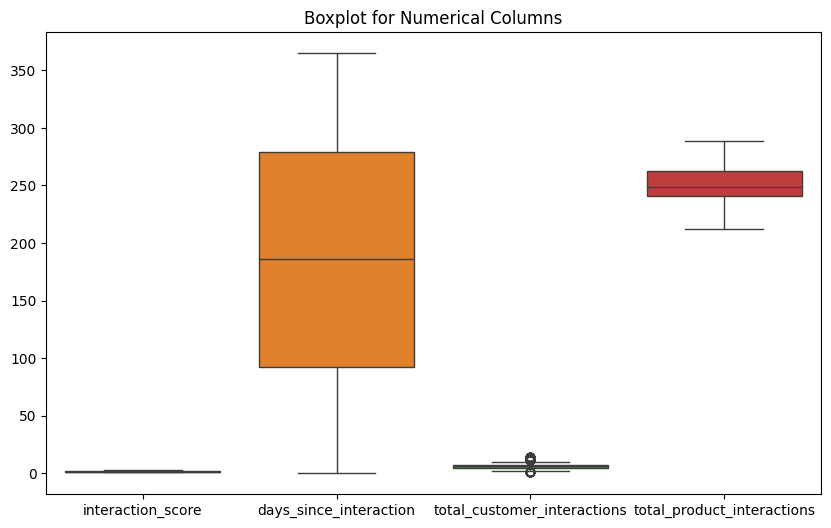

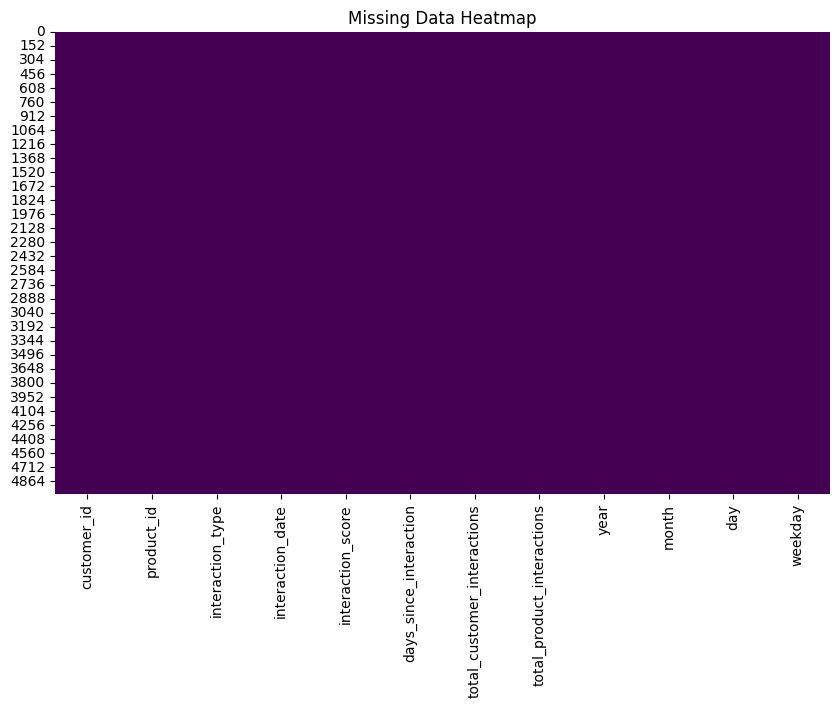

In [18]:
# Boxplot for outlier detection in numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_interactions[['interaction_score', 'days_since_interaction', 'total_customer_interactions', 'total_product_interactions']])
plt.title("Boxplot for Numerical Columns")
plt.show()

# Check for missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df_interactions.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [19]:
# Aggregated statistics for each customer
customer_summary = df_interactions.groupby('customer_id').agg({
    'total_customer_interactions': 'sum',
    'total_product_interactions': 'sum',
    'interaction_score': 'mean'
}).reset_index()

# Top 10 customers with most interactions
top_10_customers = customer_summary.nlargest(10, 'total_customer_interactions')
print(top_10_customers)

# Aggregated statistics for each product
product_summary = df_interactions.groupby('product_id').agg({
    'total_product_interactions': 'sum',
    'total_customer_interactions': 'sum'
}).reset_index()

# Top 10 products with most interactions
top_10_products = product_summary.nlargest(10, 'total_product_interactions')
print(top_10_products)


     customer_id  total_customer_interactions  total_product_interactions  \
773  CID00000780                          196                        3503   
133  CID00000136                          144                        2957   
346  CID00000352                          144                        3054   
378  CID00000384                          144                        3071   
640  CID00000647                          144                        3011   
876  CID00000883                          144                        3001   
118  CID00000121                          121                        2703   
160  CID00000163                          121                        2823   
377  CID00000383                          121                        2757   
388  CID00000394                          121                        2828   

     interaction_score  
773           1.214286  
133           1.333333  
346           1.916667  
378           1.250000  
640           1.583333  
87

In [20]:
top_10_products

product_id  total_product_interactions  total_customer_interactions
12  PROD_0013                       83521                         1710
15  PROD_0016                       78400                         1739
17  PROD_0018                       77841                         1638
4   PROD_0005                       75625                         1574
2   PROD_0003                       69169                         1528
3   PROD_0004                       66049                         1508
10  PROD_0011                       63504                         1443
13  PROD_0014                       63504                         1556
7   PROD_0008                       63001                         1493
9   PROD_0010                       62001                         1560

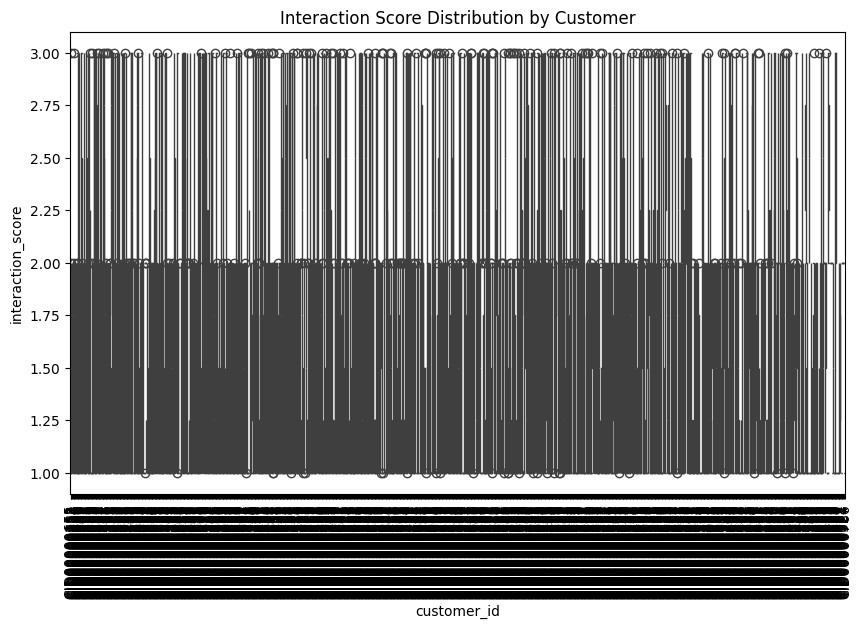

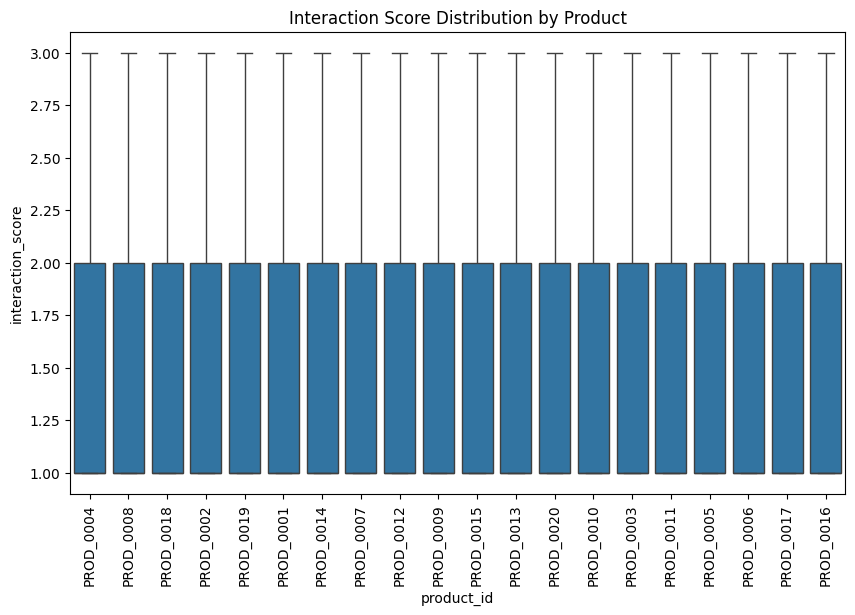

In [21]:
# Interaction score distribution by customer
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_id', y='interaction_score', data=df_interactions)
plt.xticks(rotation=90)
plt.title("Interaction Score Distribution by Customer")
plt.show()

# Interaction score distribution by product
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_id', y='interaction_score', data=df_interactions)
plt.xticks(rotation=90)
plt.title("Interaction Score Distribution by Product")
plt.show()


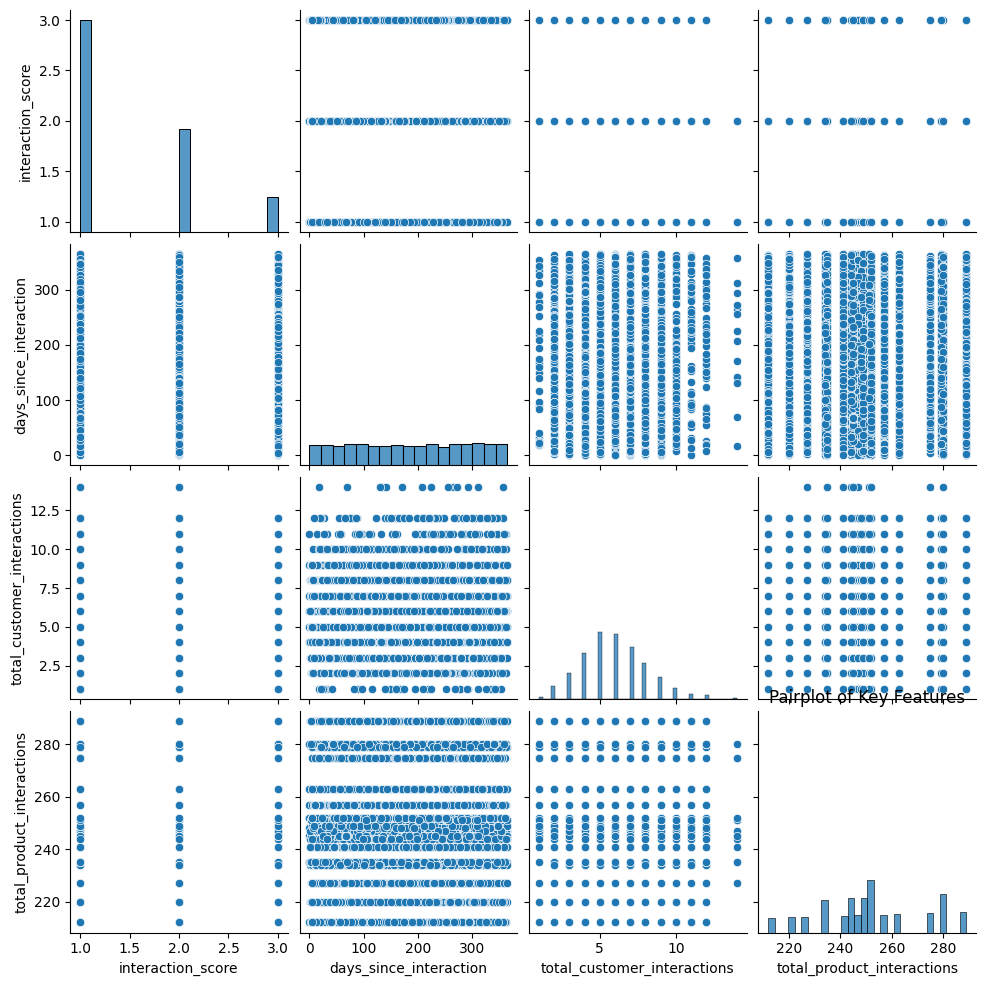

In [22]:
# Pair plot to explore relationships between features
sns.pairplot(df_interactions[['interaction_score', 'days_since_interaction', 'total_customer_interactions', 'total_product_interactions']])
plt.title("Pairplot of Key Features")
plt.show()


In [24]:
import pandas as pd

# Create a customer-product interaction matrix
interaction_matrix = df_interactions.pivot_table(index='customer_id', columns='product_id', values='interaction_score', aggfunc='mean', fill_value=0)
print(interaction_matrix.head())


product_id   PROD_0001  PROD_0002  PROD_0003  PROD_0004  PROD_0005  PROD_0006  \
customer_id                                                                     
CID00000001        0.0   2.333333        0.0        0.0        1.5        0.0   
CID00000002        0.0   0.000000        0.0        0.0        0.0        0.0   
CID00000003        2.0   0.000000        0.0        0.0        0.0        0.0   
CID00000004        0.0   0.000000        0.0        1.0        0.0        0.0   
CID00000005        0.0   2.000000        0.0        0.0        0.0        0.0   

product_id   PROD_0007  PROD_0008  PROD_0009  PROD_0010  PROD_0011  PROD_0012  \
customer_id                                                                     
CID00000001        0.0        0.0        2.0        1.0        0.0        0.0   
CID00000002        0.0        0.0        0.0        0.0        0.0        2.0   
CID00000003        0.0        0.0        0.0        2.0        0.0        0.0   
CID00000004        0.0     

In [25]:
# Normalize interaction scores (e.g., subtract the mean of each customer’s interactions)
interaction_matrix = interaction_matrix.apply(lambda row: (row - row.mean()) / (row.max() - row.min()) if row.max() - row.min() != 0 else row, axis=1)


In [26]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error

# Apply SVD on the interaction matrix
svd = TruncatedSVD(n_components=20, random_state=42)
svd_matrix = svd.fit_transform(interaction_matrix)

# Reconstruct the matrix from the reduced factors
reconstructed_matrix = np.dot(svd_matrix, svd.components_)

# Convert the reconstructed matrix back to DataFrame for easier visualization
reconstructed_df = pd.DataFrame(reconstructed_matrix, columns=interaction_matrix.columns, index=interaction_matrix.index)
print(reconstructed_df.head())


product_id   PROD_0001  PROD_0002  PROD_0003  PROD_0004  PROD_0005  PROD_0006  \
customer_id                                                                     
CID00000001  -0.232143   0.767857  -0.232143  -0.232143   0.410714  -0.232143   
CID00000002  -0.166667  -0.166667  -0.166667  -0.166667  -0.166667  -0.166667   
CID00000003   0.787500  -0.212500  -0.212500  -0.212500  -0.212500  -0.212500   
CID00000004  -0.133333  -0.133333  -0.133333   0.200000  -0.133333  -0.133333   
CID00000005  -0.150000   0.850000  -0.150000  -0.150000  -0.150000  -0.150000   

product_id   PROD_0007  PROD_0008  PROD_0009  PROD_0010  PROD_0011  PROD_0012  \
customer_id                                                                     
CID00000001  -0.232143  -0.232143   0.625000   0.196429  -0.232143  -0.232143   
CID00000002  -0.166667  -0.166667  -0.166667  -0.166667  -0.166667   0.500000   
CID00000003  -0.212500  -0.212500  -0.212500   0.787500  -0.212500  -0.212500   
CID00000004  -0.133333  -0.

In [28]:
def recommend_products(customer_id, num_recommendations=5):
    # Get the predicted scores for the customer
    customer_recommendations = reconstructed_df.loc[customer_id]
    
    # Sort the products by predicted interaction score
    recommended_products = customer_recommendations.sort_values(ascending=False).head(num_recommendations)
    
    return recommended_products.index.tolist()

# Example: Get top 5 recommendations for customer 'C123'
recommended_products = recommend_products('CID00000002', 5)
print("Recommended products:", recommended_products)


Recommended products: ['PROD_0015', 'PROD_0013', 'PROD_0012', 'PROD_0020', 'PROD_0014']


In [33]:
def precision_recall_at_k(recommended_products, customer_id, df_interactions, k=5):
    """
    Calculate precision and recall at k for a given customer,
    using the full interaction DataFrame `df_interactions`.
    """
    # Get all products the customer interacted with
    true_products = df_interactions[df_interactions['customer_id'] == customer_id]['product_id'].values
    
    recommended_products_at_k = recommended_products[:k]
    
    # Precision = (relevant recommended) / (total recommended)
    precision = len(set(recommended_products_at_k) & set(true_products)) / k
    
    # Recall = (relevant recommended) / (total relevant actual interactions)
    recall = len(set(recommended_products_at_k) & set(true_products)) / len(true_products) if len(true_products) != 0 else 0
    
    return precision, recall

# Example usage:
# recommended_products = ['P1', 'P2', 'P3', 'P4', 'P5']  # This would come from your recommendation model
customer_id = 'CID00000002'

precision, recall = precision_recall_at_k(recommended_products, customer_id, df_interactions, k=5)
print("Precision:", precision)
print("Recall:", recall)


Precision: 1.0
Recall: 0.8333333333333334


In [35]:
import numpy as np
from collections import defaultdict
from sklearn.metrics import ndcg_score

# K value for evaluation
K = 5

# Group actual interactions
actual_interactions = df_interactions.groupby('customer_id')['product_id'].apply(set).to_dict()

# Dummy recommendation function (replace this with your model’s output)
def recommend_top_k_products(customer_id, k=K):
    # For now, recommend most popular products (you should replace this with your model's prediction)
    top_products = df_interactions['product_id'].value_counts().index.tolist()
    return top_products[:k]

# Metric storage
precision_list = []
recall_list = []
average_precisions = []
ndcg_scores = []

# Evaluation loop
for customer_id, true_products in actual_interactions.items():
    recommended_products = recommend_top_k_products(customer_id, k=K)
    
    # Precision
    hits = len(set(recommended_products) & true_products)
    precision = hits / K
    recall = hits / len(true_products) if len(true_products) > 0 else 0

    # MAP@K
    ap = 0.0
    num_hits = 0
    for i, p in enumerate(recommended_products):
        if p in true_products:
            num_hits += 1
            ap += num_hits / (i + 1)
    mapk = ap / min(len(true_products), K)

    # NDCG@K
    y_true = [1 if p in true_products else 0 for p in recommended_products]
    y_score = [1.0 / (i + 1) for i in range(len(recommended_products))]
    ndcg = ndcg_score([y_true], [y_score]) if sum(y_true) > 0 else 0

    # Collect
    precision_list.append(precision)
    recall_list.append(recall)
    average_precisions.append(mapk)
    ndcg_scores.append(ndcg)

# Final results
print("📊 Mean Precision@K:", np.mean(precision_list))
print("📊 Mean Recall@K:", np.mean(recall_list))
print("📊 MAP@K:", np.mean(average_precisions))
print("📊 NDCG@K:", np.mean(ndcg_scores))


📊 Mean Precision@K: 0.24627766599597586
📊 Mean Recall@K: 0.2812464614526989
📊 MAP@K: 0.17516180415828306
📊 NDCG@K: 0.5219133379934898


In [37]:
import joblib

# Save the fitted SVD model
joblib.dump(svd, 'Models/svd_model.pkl')

# Save the reconstructed matrix (optional, for fast loading in Streamlit)
reconstructed_df.to_pickle('Models/reconstructed_matrix.pkl')
